<a href="https://colab.research.google.com/github/muhammad-usama-aleem/classification_general_military_tank/blob/main/Assigned_Task_2nd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
!pip install unrar
!unrar x /content/gdrive/MyDrive/images.rar

In [3]:
!rm -rf /content/vehicles/images

In [4]:
import os

base_dir = '/content/combined/'
os.mkdir(base_dir)

In [5]:
!mv /content/vehicles /content/combined

In [6]:
!mv /content/general /content/combined

In [7]:
!mv /content/army /content/combined

In [8]:
import numpy as np
import tensorflow as tf

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os

dataset_path = os.listdir('combined')

print (dataset_path)  #what kinds of classes are in this dataset

print("Types of classes labels found: ", len(dataset_path))

['general', 'vehicles', 'army']
Types of classes labels found:  3


In [9]:
class_labels = []

for item in dataset_path:
 # Get all the file names
 all_classes = os.listdir('combined' + '/' +item)
#  print(all_classes)

 # Add them to the list
 for room in all_classes:
    class_labels.append((item, str('dataset_path' + '/' +item) + '/' + room))
    # print(dataset_path, item, room)
print(class_labels)

[('general', 'dataset_path/general/image_79.jpg'), ('general', 'dataset_path/general/image_800.jpg'), ('general', 'dataset_path/general/image_1083.jpg'), ('general', 'dataset_path/general/image_84.jpg'), ('general', 'dataset_path/general/image_650.jpg'), ('general', 'dataset_path/general/image_490.jpg'), ('general', 'dataset_path/general/image_153.jpg'), ('general', 'dataset_path/general/image_725.jpg'), ('general', 'dataset_path/general/image_365.jpg'), ('general', 'dataset_path/general/image_442.jpg'), ('general', 'dataset_path/general/image_1420.jpg'), ('general', 'dataset_path/general/image_741.jpg'), ('general', 'dataset_path/general/image_418.jpg'), ('general', 'dataset_path/general/image_1217.jpg'), ('general', 'dataset_path/general/image_1495.jpg'), ('general', 'dataset_path/general/image_1077.jpg'), ('general', 'dataset_path/general/image_688.jpg'), ('general', 'dataset_path/general/image_1531.jpg'), ('general', 'dataset_path/general/image_1541.jpg'), ('general', 'dataset_path

In [10]:
# Build a dataframe        
df = pd.DataFrame(data=class_labels, columns=['Labels', 'image'])
print(df.head())
print(df.tail())

    Labels                                image
0  general    dataset_path/general/image_79.jpg
1  general   dataset_path/general/image_800.jpg
2  general  dataset_path/general/image_1083.jpg
3  general    dataset_path/general/image_84.jpg
4  general   dataset_path/general/image_650.jpg
     Labels                                              image
1510   army                          dataset_path/army/471.png
1511   army                           dataset_path/army/49.png
1512   army  dataset_path/army/images_q=tbn_ANd9GcRVq6gGGjX...
1513   army                          dataset_path/army/308.png
1514   army                          dataset_path/army/321.png


In [11]:
# Let's check how many samples for each category are present
print("Total number of images in the dataset: ", len(df))

label_count = df['Labels'].value_counts()
print(label_count)

Total number of images in the dataset:  1515
general     513
army        502
vehicles    500
Name: Labels, dtype: int64


In [12]:
import cv2
path = 'combined/'
dataset_path = os.listdir('combined')

im_size = 224

images = []
labels = []

for i in dataset_path:
    data_path = path + str(i)
    filenames = [i for i in os.listdir(data_path) ]
    print(data_path)
    for f in filenames:
        img = cv2.imread(data_path + '/' + f)

        
        img = cv2.resize(img, (im_size, im_size))
        images.append(img)
        labels.append(i)

combined/general
combined/vehicles
combined/army


In [13]:
images = np.array(images)
print(images.shape)
images = images.astype('float32') / 255.0
# images = preprocess_input(images)
print(images.shape)

(1515, 224, 224, 3)
(1515, 224, 224, 3)


In [14]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
y=df['Labels'].values
print(y)
print(len(y))
print(list(set(y)))
y_labelencoder = LabelEncoder ()
y = y_labelencoder.fit_transform (y)
print(y)
print(list(set(y)))

['general' 'general' 'general' ... 'army' 'army' 'army']
1515
['army', 'vehicles', 'general']
[1 1 1 ... 0 0 0]
[0, 1, 2]


In [15]:
y=y.reshape(-1,1)

from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('my_ohe', OneHotEncoder(), [0])], remainder='passthrough')
Y = ct.fit_transform(y) #.toarray()
print(Y[:5])
print(Y[35:])

[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]
[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 ...
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [16]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


images, Y = shuffle(images, Y, random_state=1)


train_x, test_x, train_y, test_y = train_test_split(images, Y, test_size=0.2, random_state=0)

#inpect the shape of the training and testing.
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(1212, 224, 224, 3)
(1212, 3)
(303, 224, 224, 3)
(303, 3)


In [17]:
from tensorflow.keras import layers
from tensorflow.keras.applications import EfficientNetB0

NUM_CLASSES = 3
IMG_SIZE = 224
size = (IMG_SIZE, IMG_SIZE)


inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))


# Using model without transfer learning

outputs = EfficientNetB0(include_top=True, weights=None, classes=NUM_CLASSES)(inputs)

In [18]:
model = tf.keras.Model(inputs, outputs)

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"] )
# change optimizer and loss function

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, 3)                 4053414   
Total params: 4,053,414
Trainable params: 4,011,391
Non-trainable params: 42,023
_________________________________________________________________


In [19]:
hist = model.fit(train_x, train_y, epochs=30, verbose=2)

Epoch 1/30
38/38 - 62s - loss: 3.2123 - accuracy: 0.3960
Epoch 2/30
38/38 - 20s - loss: 1.4103 - accuracy: 0.4356
Epoch 3/30
38/38 - 20s - loss: 1.0358 - accuracy: 0.5421
Epoch 4/30
38/38 - 20s - loss: 1.0367 - accuracy: 0.6526
Epoch 5/30
38/38 - 20s - loss: 0.7375 - accuracy: 0.7030
Epoch 6/30
38/38 - 20s - loss: 0.4960 - accuracy: 0.8218
Epoch 7/30
38/38 - 20s - loss: 0.3604 - accuracy: 0.8729
Epoch 8/30
38/38 - 20s - loss: 0.3656 - accuracy: 0.8573
Epoch 9/30
38/38 - 20s - loss: 0.2719 - accuracy: 0.9109
Epoch 10/30
38/38 - 20s - loss: 0.2293 - accuracy: 0.9249
Epoch 11/30
38/38 - 20s - loss: 0.3286 - accuracy: 0.9299
Epoch 12/30
38/38 - 20s - loss: 0.1549 - accuracy: 0.9439
Epoch 13/30
38/38 - 20s - loss: 0.1155 - accuracy: 0.9612
Epoch 14/30
38/38 - 20s - loss: 0.1360 - accuracy: 0.9538
Epoch 15/30
38/38 - 20s - loss: 0.1601 - accuracy: 0.9629
Epoch 16/30
38/38 - 20s - loss: 0.2785 - accuracy: 0.9497
Epoch 17/30
38/38 - 20s - loss: 0.1694 - accuracy: 0.9398
Epoch 18/30
38/38 - 20s

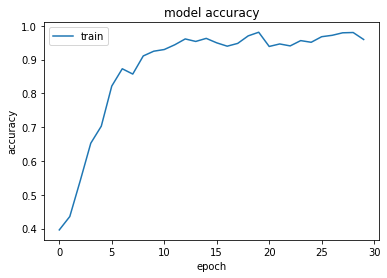

In [20]:
import matplotlib.pyplot as plt


def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    #plt.plot(hist.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()


plot_hist(hist)

In [21]:
preds = model.evaluate(test_x, test_y)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

10/10 [==============================] - 3s 179ms/step - loss: 3.2702 - accuracy: 0.6040
Loss = 3.2701759338378906
Test Accuracy = 0.603960394859314


In [23]:
pred = model.predict(test_x)

from sklearn.metrics import confusion_matrix
pred = np.argmax(pred, axis=1)
test_y = np.argmax(test_y, axis=1)
confusion = confusion_matrix(test_y, pred)
print('Confusion Matrix\n')
print(confusion)

Confusion Matrix

[[68  8 34]
 [30 29 40]
 [ 6  2 86]]


[1, 0, 0]
army


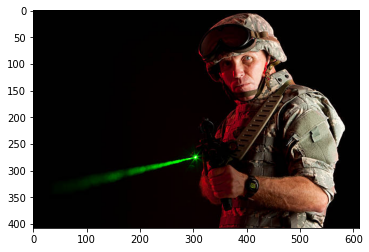

In [28]:
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.efficientnet import decode_predictions
from tensorflow.keras.applications.efficientnet import preprocess_input


img_path = '/content/combined/army/100.png'


img = cv2.imread(img_path)
img = cv2.resize(img, (224, 224))
img_array = image.img_to_array(img)

img_batch = np.expand_dims(img_array, axis=0)

img_preprocessed = preprocess_input(img_batch)

my_image = imread(img_path)
imshow(my_image)

preds=model.predict(img_preprocessed)

joined = preds[0]
# print(joined)
# joined = np.argmax(joined, axis=0)
joined[np.where(joined==np.max(joined)) ] = 1
joined[np.where(joined!=np.max(joined)) ] = 0
joined = list(map(int,joined))
print(joined)
label = ['army', 'general', 'vehicle']
zipped = zip(joined, label)
for i in list(zipped):
  if i[0] == 1:
    print(i[1])


[0, 0, 1]
vehicle


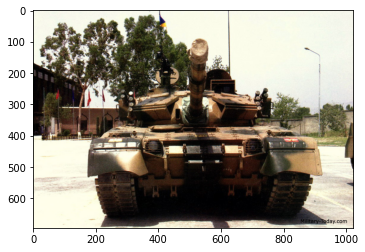

In [29]:
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.efficientnet import decode_predictions
from tensorflow.keras.applications.efficientnet import preprocess_input


img_path = '/content/combined/vehicles/al_khalid_l1.jpg'


img = cv2.imread(img_path)
img = cv2.resize(img, (224, 224))
img_array = image.img_to_array(img)

img_batch = np.expand_dims(img_array, axis=0)

img_preprocessed = preprocess_input(img_batch)

my_image = imread(img_path)
imshow(my_image)

preds=model.predict(img_preprocessed)

joined = preds[0]
# print(joined)
# joined = np.argmax(joined, axis=0)
joined[np.where(joined==np.max(joined)) ] = 1
joined[np.where(joined!=np.max(joined)) ] = 0
joined = list(map(int,joined))
print(joined)
label = ['army', 'general', 'vehicle']
zipped = zip(joined, label)
for i in list(zipped):
  if i[0] == 1:
    print(i[1])


[1, 0, 0]
army


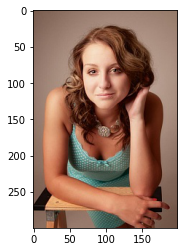

In [30]:
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.efficientnet import decode_predictions
from tensorflow.keras.applications.efficientnet import preprocess_input


img_path = '/content/combined/general/image_100.jpg'

img = cv2.imread(img_path)
img = cv2.resize(img, (224, 224))
img_array = image.img_to_array(img)

img_batch = np.expand_dims(img_array, axis=0)

img_preprocessed = preprocess_input(img_batch)

my_image = imread(img_path)
imshow(my_image)

preds=model.predict(img_preprocessed)

joined = preds[0]
# print(joined)
# joined = np.argmax(joined, axis=0)
joined[np.where(joined==np.max(joined)) ] = 1
joined[np.where(joined!=np.max(joined)) ] = 0
joined = list(map(int,joined))
print(joined)
label = ['army', 'general', 'vehicle']
zipped = zip(joined, label)
for i in list(zipped):
  if i[0] == 1:
    print(i[1])

# SAVING RESULTS

In [31]:
import os

res_dir = '/content/results/'
os.mkdir(res_dir)

#create two folders (train and validation)
army_dir = os.path.join(res_dir, 'army')
os.mkdir(army_dir)

general_dir = os.path.join(res_dir, 'general')
os.mkdir(general_dir)

vehicle_dir = os.path.join(res_dir, 'vehicle')
os.mkdir(vehicle_dir)

#Under army folder create five folders 

army_cloud_dir = os.path.join(army_dir, 'army')
os.mkdir(army_cloud_dir)

army_foggy_dir = os.path.join(army_dir, 'general')
os.mkdir(army_foggy_dir)

army_rainy_dir = os.path.join(army_dir, 'vehicle')
os.mkdir(army_rainy_dir)

#Under general folder create five folders 

general_cloud_dir = os.path.join(general_dir, 'army')
os.mkdir(general_cloud_dir)

general_foggy_dir = os.path.join(general_dir, 'general')
os.mkdir(general_foggy_dir)

general_rainy_dir = os.path.join(general_dir, 'vehicle')
os.mkdir(general_rainy_dir)

#Under vehicle folder create five folders 

vehicle_cloud_dir = os.path.join(vehicle_dir, 'army')
os.mkdir(vehicle_cloud_dir)

vehicle_foggy_dir = os.path.join(vehicle_dir, 'general')
os.mkdir(vehicle_foggy_dir)

vehicle_rainy_dir = os.path.join(vehicle_dir, 'vehicle')
os.mkdir(vehicle_rainy_dir)

In [37]:
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.applications.imagenet_utils import preprocess_input

def arrange(img_path):
  name = img_path.split("general/",1)[1]
  img = cv2.imread(img_path)
  img = cv2.resize(img, (224, 224))

  x = np.expand_dims(img, axis=0)
  x = preprocess_input(x)
  # print('Input image shape:', x.shape)

  preds=model.predict(x)
  # print(preds[0])
  joined = preds[0]
  joined = list(map(int,joined))
  label = ['army', 'general', 'vehicle']
  zipped = zip(joined, label)
  for i in list(zipped):
    if i[0] == 1:
      print(i[1])
      copyfile(img_path, '/content/results/general/' + i[1] + '/'+ name)


In [38]:
from shutil import copyfile

for filename in os.listdir('/content/combined/general'):
  arrange('/content/combined/general/'+filename)

vehicle
army
vehicle
army
vehicle
vehicle
vehicle
army
vehicle
army
army
vehicle
vehicle
army
army
army
army
vehicle
army
army
vehicle
army
army
army
army
vehicle
army
army
army
army
army
vehicle
vehicle
vehicle
army
army
army
army
army
army
vehicle
vehicle
vehicle
army
army
army
army
vehicle
army
army
army
vehicle
vehicle
army
army
vehicle
vehicle
army
army
army
army
vehicle
vehicle
army
army
army
army
army
vehicle
army
army
army
vehicle
army
army
army
vehicle
army
army
army
army
vehicle
vehicle
army
army
army
army
army
army
army
vehicle
army
army
army
army
vehicle
army
vehicle
army
vehicle
army
army
army
army
vehicle
army
army
army
army
army
army
army
army
army
army
army
army
vehicle
army
vehicle
army
vehicle
army
army
army
vehicle
army
army
vehicle
army
army
army
army
vehicle
army
vehicle
army
army
army
army
army
army
vehicle
army
army
army
army
army
army
army
army
army
army
army
army
vehicle
army
army
vehicle
vehicle
vehicle
army
army
army
vehicle
army
vehicle
army
army
vehicle
arm

In [39]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [40]:
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
!zip -r /content/result.zip /content/results

In [42]:
from google.colab import files
files.download("/content/result.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>